In [32]:
from sklearn.linear_model import LogisticRegression
import pandas as pd 
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import make_scorer, roc_auc_score
from sklearn.model_selection import StratifiedKFold
import matplotlib.pyplot as plt

X = pd.read_pickle("X.pkl")
features = X.columns
y = pd.read_pickle("y.pkl")
y = np.ravel(y)

print(features)

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking'],
      dtype='object')


C:\Users\User\AppData\Local\Temp\ipykernel_21380\2643380677.py:28: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(boxplot_data, labels=top_features, patch_artist=True)


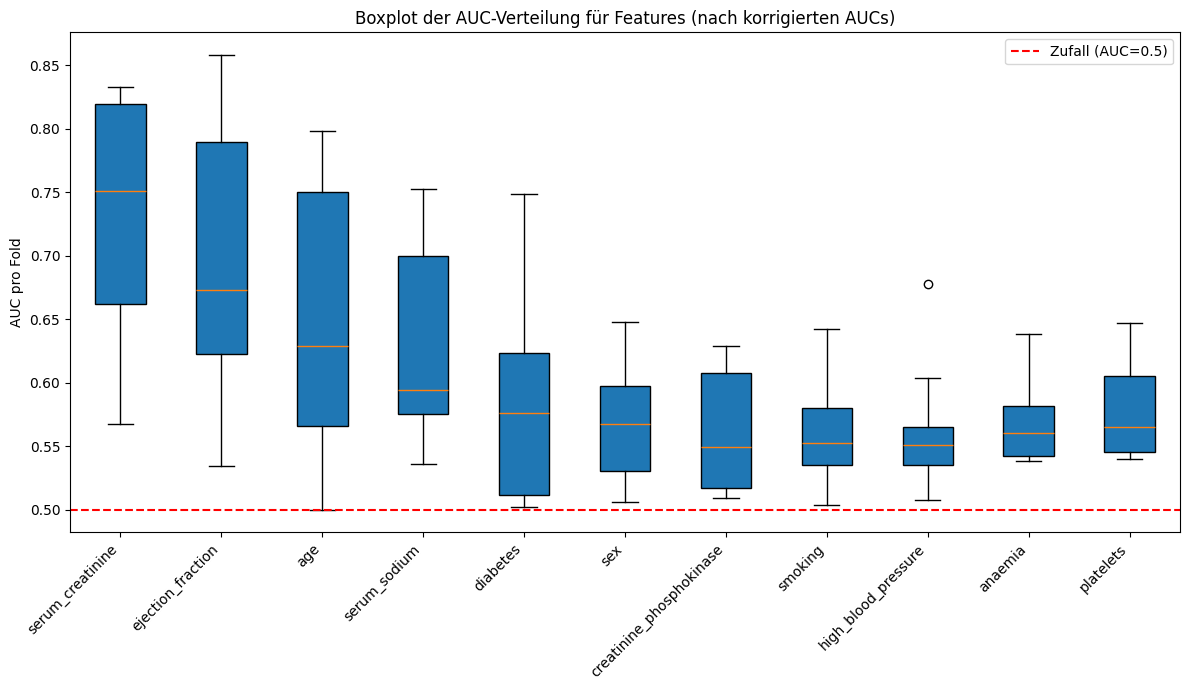

In [33]:
feature_auc_scores = {}
feature_all_auc_scores = {}
cv = StratifiedKFold(n_splits=8)

for feature in features:
    model = LogisticRegression()
    auc_scores = cross_val_score(
        model, X[[feature]], y,
        cv=cv,  # 5-fold cross-validation
        scoring='roc_auc'
    )

    # Mittelwert speichern
    auc_score = np.mean(auc_scores)
    if auc_score < 0.5:
        auc_score = 1 - auc_score
    feature_auc_scores[feature] = auc_score
    feature_all_auc_scores[feature] = np.where(auc_scores < 0.5, 1 - auc_scores, auc_scores)
    
sorted_features = sorted(feature_auc_scores.items(), key=lambda x: x[1], reverse=True)
top_features = [f for f, _ in sorted_features]  # alle Features sortiert

# Boxplot-Daten vorbereiten (alle Features)
boxplot_data = [feature_all_auc_scores[f] for f in top_features]

# Plot
plt.figure(figsize=(12, 7))
plt.boxplot(boxplot_data, labels=top_features, patch_artist=True)
plt.xticks(rotation=45, ha='right')
plt.axhline(0.5, color='red', linestyle='--', label='Zufall (AUC=0.5)')
plt.ylabel("AUC pro Fold")
plt.title("Boxplot der AUC-Verteilung für Features (nach korrigierten AUCs)")
plt.legend()
plt.tight_layout()
plt.show()

C:\Users\User\AppData\Local\Temp\ipykernel_21380\2696487089.py:31: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(boxplot_data, labels=labels, patch_artist=True)


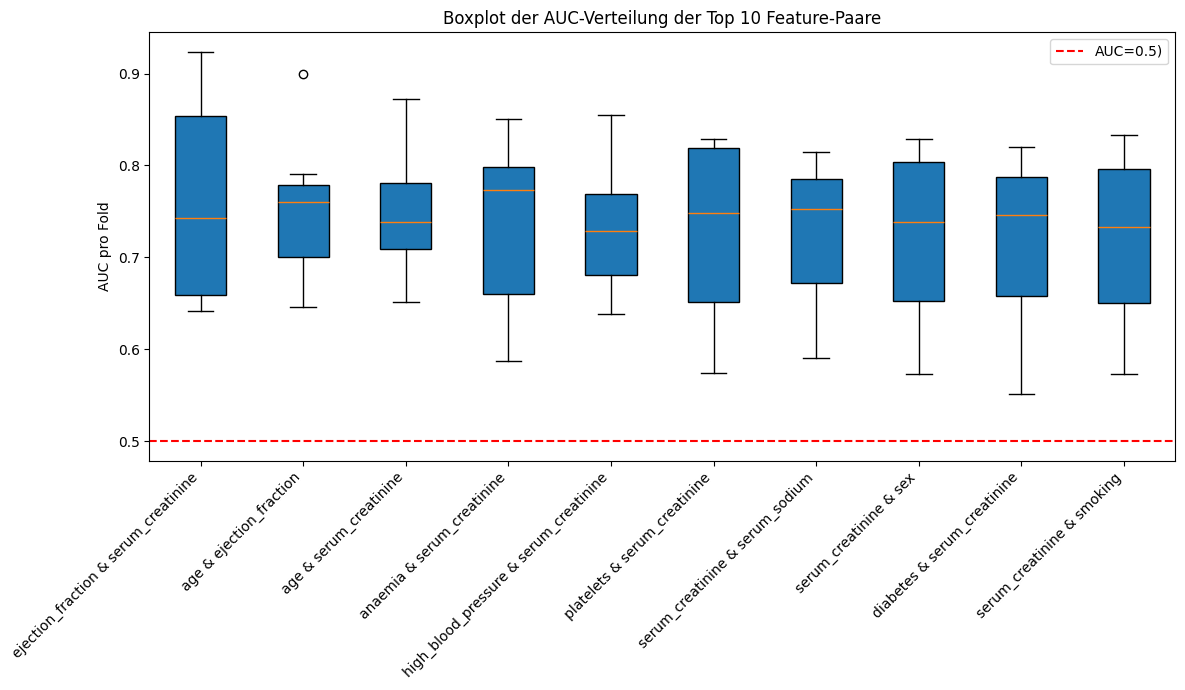

In [34]:
import itertools

feature_pairs = list(itertools.combinations(X.columns, 2))
pair_all_auc_scores = {}
pair_auc_scores = {}

for feature in feature_pairs:
    model = LogisticRegression()
    auc_scores = cross_val_score(
        model, X[list(feature)], y,
        cv=cv, 
        scoring='roc_auc'
    )

    auc_score = np.mean(auc_scores)
    pair_all_auc_scores[feature] = auc_scores
    pair_auc_scores[feature] = auc_score
    
sorted_pairs = sorted(pair_auc_scores.items(), key=lambda x: x[1], reverse=True)

# Hole Top 10 (oder alle, je nach Wunsch)
top_n = 10
top_pairs = [pair for pair, _ in sorted_pairs[:top_n]]

# Hole AUC-Werte pro Fold für Top Paare
boxplot_data = [pair_all_auc_scores[pair] for pair in top_pairs]
labels = [f"{p[0]} & {p[1]}" for p in top_pairs]

# Plot
plt.figure(figsize=(12, 7))
plt.boxplot(boxplot_data, labels=labels, patch_artist=True)
plt.xticks(rotation=45, ha='right')
plt.axhline(0.5, color='red', linestyle='--', label='AUC=0.5)')
plt.ylabel("AUC pro Fold")
plt.title(f"Boxplot der AUC-Verteilung der Top {top_n} Feature-Paare")
plt.legend()
plt.tight_layout()
plt.show()